# Trabalho de Introdução a Ciência de Dados.

* Karen Neves - n12559357
* Lucas Cano - n12873104
* Lucas Szavara - n12690087
* Matheus Nobre - n12558398
* Thalita Sousa - n12559187

# Bibliotecas:

In [1]:
!pip install catboost
from catboost import CatBoostClassifier
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as skdata
from pandas import DataFrame
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import VarianceThreshold

pd.set_option('display.max_columns', None)
np.random.seed(42)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Análise exploratória:

Separamos o dataset em teste e treino e separa os atributos da variável resposta:

In [2]:
df = pd.read_csv('bank.csv')
df.head()
X, y = df.iloc[:, 1:], df.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42, stratify=y)

In [3]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

**Descrição do dataset:**

Esse dataset, que pode ser encontrado em [https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction](https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction), busca identificar se empresas estão em risco de falir de acordo com outros atributos:

*   Y - Bankrupt?: Variavel resposta de uma empresa faliu ou não
*   X1 - ROA(C) before interest and depreciation before interest: Retorno total de bens(C) antes dos juros e desvalorização antes dos juros
*   X2 - ROA(A) before interest and % after tax: Retorno total de bens(A) antes dos juros e % após o imposto
*   X3 - ROA(B) before interest and depreciation after tax: Retorno total de bens(B) antes dos juros e desvalorização após imposto
*   X4 - Operating Gross Margin: Lucro bruto/vendas líquidas
*   X5 - Realized Sales Gross Margin: Lucro bruto realizado/vendas líquidas
*   X6 - Operating Profit Rate: Renda operavel/vendas líquidas
*   X7 - Pre-tax net Interest Rate: Renda antes do imposto/vendas líquidas
*   X8 - After-tax net Interest Rate: lucro liquido/vendas líquidas
*   X9 - Non-industry income and expenditure/revenue: Razão da renda liquida não operada
*   X10 - Continuous interest rate (after tax): lucro liquido-excluindo ganhos ou perdas/vendas líquidas
*   X11 - Operating Expense Rate: Despesas operacionais/vendas líquidas
*   X12 - Research and development expense rate: (Despesas de pesquisa e desenvolvimento)/vendas líquidas
*   X13 - Cash flow rate: Fluxo de dinheiro enquanto opera/Passivos correntes
*   X14 - Interest-bearing debt interest rate: Debito total/Patrimonio liquido
*   X15 - Tax rate (A): taxa efectiva de imposto
*   X16 - Net Value Per Share (B): valor patrimonial por ação(B)
*   X17 - Net Value Per Share (A): valor patrimonial por ação(A)
*   X18 - Net Value Per Share (C): valor patrimonial por ação(C)
*   X19 - Persistent EPS in the Last Four Seasons: Lucro liquido por ação
*   X20 - Cash Flow Per Share: Fluxo de dinheiro por ação
*   X21 - Revenue Per Share (Yuan ¥): Vendas por ação
*   X22 - Operating Profit Per Share (Yuan ¥): Renda operacional por ação
*   X23 - Per Share Net profit before tax (Yuan ¥): Renda antes do imposto por ação
*   X24 - Realized Sales Gross Profit Growth Rate: Razão de crescimento de lucro por vendas
*   X25 - Operating Profit Growth Rate: Crecimento de lucro por venda
*   X26 - After-tax Net Profit Growth Rate: Crescimento do lucro liquido
*   X27 - Regular Net Profit Growth Rate: Lucro mantido em operação após aplicação do imposto
*   X28 - Continuous Net Profit Growth Rate: Renda liquida excluindo perda de ganhos ou diminuição do crescimento
*   X29 - Total Asset Growth Rate: Crescimento total dos ativos
*   X30 - Net Value Growth Rate: Crescimento total de Patrimonio liquido
*   X31 - Total Asset Return Growth Rate Ratio: Retorno total do crscimento dos ativos
*   X32 - Cash Reinvestment %: Razão de reinvestimento de dinheiro
*   X33 - Current Ratio: Razão atual
*   X34 - Quick Ratio: Teste decisivo
*   X35 - Interest Expense Ratio: Despesas com juros/Renda total
*   X36 - Total debt/Total net worth: Passivo total/razão do Patrimonio liquido
*   X37 - Debt ratio %: Passivo/Ativos totais
*   X38 - Net worth/Assets: Patrimonio liquido/Ativos totais
*   X39 - Long-term fund suitability ratio (A): (Passivos a longo prazo+Patrimonio liquido)/Ativos
*   X40 - Borrowing dependency: Custo dos juros-taxa de juros
*   X41 - Contingent liabilities/Net worth: Passivo contigente/Patrimonio liquido
*   X42 - Operating profit/Paid-in capital: Renda operacional/Capital
*   X43 - Net profit before tax/Paid-in capital: Renda antes do imposto/Capital
*   X44 - Inventory and accounts receivable/Net value: (Inventario+Contas a receber)/Patrimonio liquido
*   X45 - Total Asset Turnover: Renovação de ativos totais
*   X46 - Accounts Receivable Turnover: Renovação das contas a receber
*   X47 - Average Collection Days: Índice diário de contas a receber
*   X48 - Inventory Turnover Rate (times): Razão da renovação de contas
*   X49 - Fixed Assets Turnover Frequency: Frequencia da renovação de passivos a longo prazo
*   X50 - Net Worth Turnover Rate (times): Renocação do patrimonio liquido
*   X51 - Revenue per person: Vendas por empregado
*   X52 - Operating profit per person: Lucro operacional por empregado
*   X53 - Allocation rate per person: Passivos a longo prazo por empregado
*   X54 - Working Capital to Total Assets: Fluxo de capital para ativos totais
*   X55 - Quick Assets/Total Assets: Passivos a curto prazo/ativos totais
*   X56 - Current Assets/Total Assets: Passivos atuais/ativos totais
*   X57 - Cash/Total Assets: Dinheiro/ativos totais
*   X58 - Quick Assets/Current Liability: Passivos a curto prazo/passivos atuais
*   X59 - Cash/Current Liability: Dinheiro/passivos atuais
*   X60 - Current Liability to Assets: Passivos atuais para ativos
*   X61 - Operating Funds to Liability: Fundos operacionais para passivos
*   X62 - Inventory/Working Capital: Inventory/fluxo de capital
*   X63 - Inventory/Current Liability: Inventory/passivos atuais
*   X64 - Current Liabilities/Liability: Passivos atuais/passivos
*   X65 - Working Capital/Equity: Fluxo de capital/patrimonio liquido
*   X66 - Current Liabilities/Equity: Passivos a curto prazo/patrimonio liquido
*   X67 - Long-term Liability to Current Assets: Passivos a longo prazo para ativos atuais
*   X68 - Retained Earnings to Total Assets:Lucros acumulados para ativos totais
*   X69 - Total income/Total expense: Renda total/Despesas totais
*   X70 - Total expense/Assets: Despesas totais/ativos
*   X71 - Current Asset Turnover Rate: Ativos atuais para vendas
*   X72 - Quick Asset Turnover Rate: Ativos a curto prazo para vendas
*   X73 - Working capitcal Turnover Rate: Fluxo de capital para vendas
*   X74 - Cash Turnover Rate: Dinheiro para vendas
*   X75 - Cash Flow to Sales: Fluxo de dinheiro para vendas
*   X76 - Fixed Assets to Assets: Passivos a longo prazo para passivos
*   X77 - Current Liability to Liability: Passivos atuais para passivos
*   X78 - Current Liability to Equity: Passivos atuais para patrimonio liquido
*   X79 - Equity to Long-term Liability: Patrimonio liquido para passivos a longo prazo
*   X80 - Cash Flow to Total Assets: Fluxo de dinheiro para ativos totais
*   X81 - Cash Flow to Liability: Fluxo de dinheiro para passivos
*   X82 - CFO to Assets: Diretor financeiro para ativos
*   X83 - Cash Flow to Equity: Fluxo de dinheiro para patrimonio liquido
*   X84 - Current Liability to Current Assets: Passivos atuais para ativos atuais
*   X85 - Liability-Assets Flag: 1 caso passivos totais excedem ativos totais, 0 caso contrario
*   X86 - Net Income to Total Assets: Renda liquida para ativos totais
*   X87 - Total assets to GNP price: Ativos totais para preco do PIB
*   X88 - No-credit Interval: Intervalo sem credito
*   X89 - Gross Profit to Sales: Lucro bruto para vendas
*   X90 - Net Income to Stockholder's Equity: Valor da empresa em lucro liquido
*   X91 - Liability to Equity: Porcentagem do patrimonio passivo que vai para o *   liquido
*   X92 - Degree of Financial Leverage (DFL): Grau da alavancagem financeira
*   X93 - Interest Coverage Ratio (Interest expense to EBIT): Capacidade de pagar juros sem fazer cortes
*   X94 - Net Income Flag: Alerta para lucro liquido
*   X95 - Equity to Liability: Porcentagem do patrimônio liquido que vai para o passivo



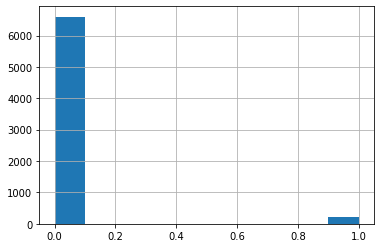

In [4]:
df['Bankrupt?'].hist()

Vemos que existe um desbalanceamento entre as classes, vamos verificar o efeito disso na classificação em próximas etapas.

Agora, verificamos a quantidade de valores Nulos no dataset

In [5]:
print(df.isnull().sum().sum())

0


Usamos o t-SNE para reduzir a dimensão do dataset para podermos identificar grupos nos dados:

In [6]:
transformed = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30).fit_transform(X)

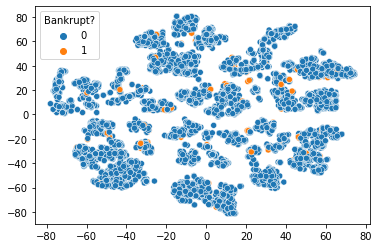

In [7]:
sns.scatterplot(x=transformed[: , 0], y=transformed[:, 1], hue=y)

Vemos que, apesar de existirem diversos grupos, eles não permitem identificar se a empresa corre o risco de falir.

Como temos 95 atributos, precisamos remover alguns para evitar *overfitting* do modelo. Primeiramente, removemos os atributos constantes:

In [8]:

sel = VarianceThreshold()
sel.fit(X_train)
data_train = pd.DataFrame(sel.transform(X_train))
X_test = sel.transform(X_test)

E em seguida, vamos remover atributos altamente correlacionados entre si, mantendo apenas um deles:

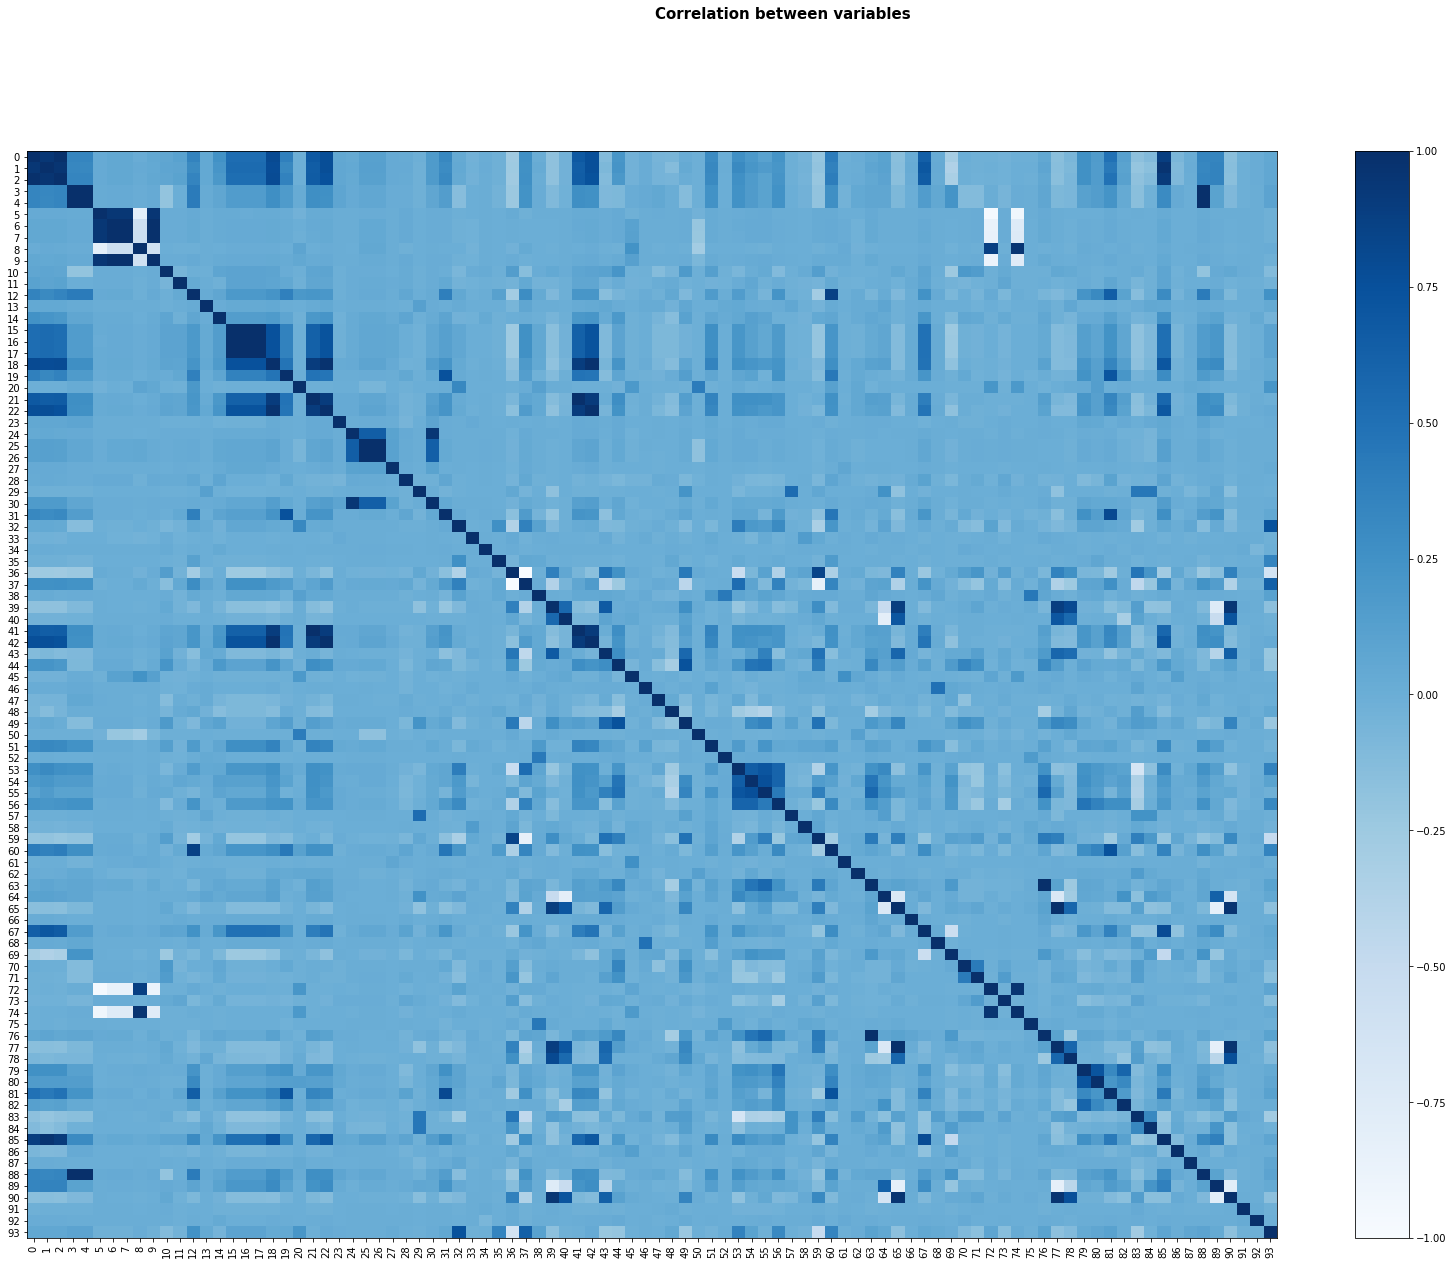

In [9]:

corr = data_train.corr()
#Plot Correlation Matrix using Matplotlib
plt.figure(figsize=(28, 20))
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

In [10]:
def trimm_correlated(df_train, df_test, threshold):
    df_corr = df_train.corr(method='pearson', min_periods=1)
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_train[un_corr_idx]
    df_out_test = df_test[un_corr_idx]
    return df_out, df_out_test

In [11]:
data_train, data_test = trimm_correlated(data_train, pd.DataFrame(X_test), 0.85)
data_train.head()

,0,3,5,8,10,11,12,13,14,15,18,19,20,23,24,25,27,28,29,31,32,33,34,35,36,38,39,40,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,61,62,63,64,66,67,68,69,70,71,73,75,78,79,80,81,82,83,84,86,87,89,91,92,93
0,0.493784,0.598524,0.998980,0.303595,6.780000e+09,0.000000e+00,0.466210,0.000432,0.196072,0.200919,0.221424,0.321214,0.030507,0.022238,0.848256,0.690475,0.221159,7.200000e+09,0.000456,0.380565,0.011323,0.005382,0.630702,0.002071,0.054479,0.005227,0.369637,0.005780,0.397851,0.142429,0.002082,0.003039,1.264903e-04,0.000169,0.027419,0.015863,0.392958,0.013138,0.788318,0.146419,0.291350,0.007823,0.005575,0.000846,0.048699,0.277522,0.015190,0.813360,0.733835,0.000000,0.932937,0.002378,0.012305,7.670000e+09,3.780000e+09,6.250000e+08,0.452605,0.110933,0.635412,0.455924,0.586432,0.313704,0.025832,0.0,0.001637,0.623661,0.840649,0.026814,0.565265,0.070742
1,0.534393,0.599302,0.999023,0.303524,3.520000e+09,0.000000e+00,0.465192,0.000321,0.255087,0.195946,0.249031,0.330268,0.138119,0.022206,0.848220,0.689580,0.217614,7.250000e+08,0.000470,0.383210,0.011338,0.009921,0.630861,0.010805,0.160474,0.005774,0.375230,0.007560,0.414694,0.389805,0.000866,0.007305,4.209339e-04,0.001297,0.100806,0.156897,0.424617,0.015480,0.853149,0.746200,0.800978,0.035033,0.010236,0.001401,0.132502,0.277090,0.003201,0.784949,0.741153,0.003542,0.942162,0.002533,0.017890,7.580000e+08,7.530000e+09,1.020000e+09,0.147509,0.116740,0.649119,0.460260,0.611292,0.315824,0.025795,0.0,0.001079,0.624307,0.843248,0.026852,0.565433,0.022433
2,0.526398,0.606740,0.999103,0.303622,7.630000e+09,1.410000e+09,0.470258,0.000000,0.235753,0.187898,0.230689,0.323477,0.023655,0.022121,0.848065,0.689443,0.217594,6.550000e+09,0.000446,0.374818,0.017457,0.016431,0.630613,0.002555,0.064456,0.005515,0.369637,0.005366,0.398180,0.122939,0.000763,0.008283,4.121445e-04,0.000226,0.025968,0.018712,0.400828,0.010574,0.835867,0.464273,0.473712,0.237578,0.016525,0.024360,0.051387,0.277021,0.002758,0.731949,0.736437,0.000000,0.941995,0.002726,0.011238,1.495043e-04,1.522818e-04,2.110733e-04,0.277491,0.110933,0.676644,0.472124,0.606997,0.318599,0.016805,0.0,0.002505,0.624714,0.841982,0.026791,0.565159,0.059856
3,0.469702,0.595375,0.998967,0.303530,3.080000e+09,0.000000e+00,0.463531,0.000507,0.341533,0.183052,0.216413,0.326059,0.063206,0.022039,0.847997,0.689399,0.217600,6.110000e+09,0.000443,0.390075,0.009404,0.005714,0.632830,0.012419,0.170723,0.007815,0.372887,0.005366,0.409535,0.188906,0.000590,0.010699,1.530495e-04,0.002344,0.057903,0.061986,0.393162,0.003120,0.838999,0.795756,0.898031,0.092410,0.008087,0.002751,0.178165,0.277185,0.003755,0.997203,0.740521,0.000000,0.935162,0.002266,0.009103,1.813344e-04,1.651411e-04,5.200000e+09,0.039004,0.110933,0.674861,0.464060,0.599958,0.321577,0.030998,0.0,0.003100,0.624621,0.840248,0.027673,0.567450,0.020864
4,0.391557,0.664495,0.995856,0.304281,4.252648e-03,3.719318e-03,0.437313,0.000000,0.000000,0.162151,0.202609,0.313221,0.000726,0.022092,0.846990,0.686752,0.217284,1.347734e-04,0.000641,0.367488,0.064863,0.063631,0.630612,0.000461,0.014149,0.015991,0.369637,0.005366,0.394007,0.010495,0.000870,0.007270,1.910000e+07,0.000312,0.010000,0.000972,0.381832,0.000747,0.910421,0.666841,0.638851,0.035042,0.064993,0.009813,0.018513,0.276975,0.000000,1.000000,0.738884,0.000000,0.917002,0.002049,0.037158,3.460798e-03,3.629135e-03,4.892226e-04,0.023914,0.110933,0.622541,0.430454,0.522352,0.312560,0.004359,0.0,0.000198,0.624242,0.838115,0.026791,0.565158,0.233952


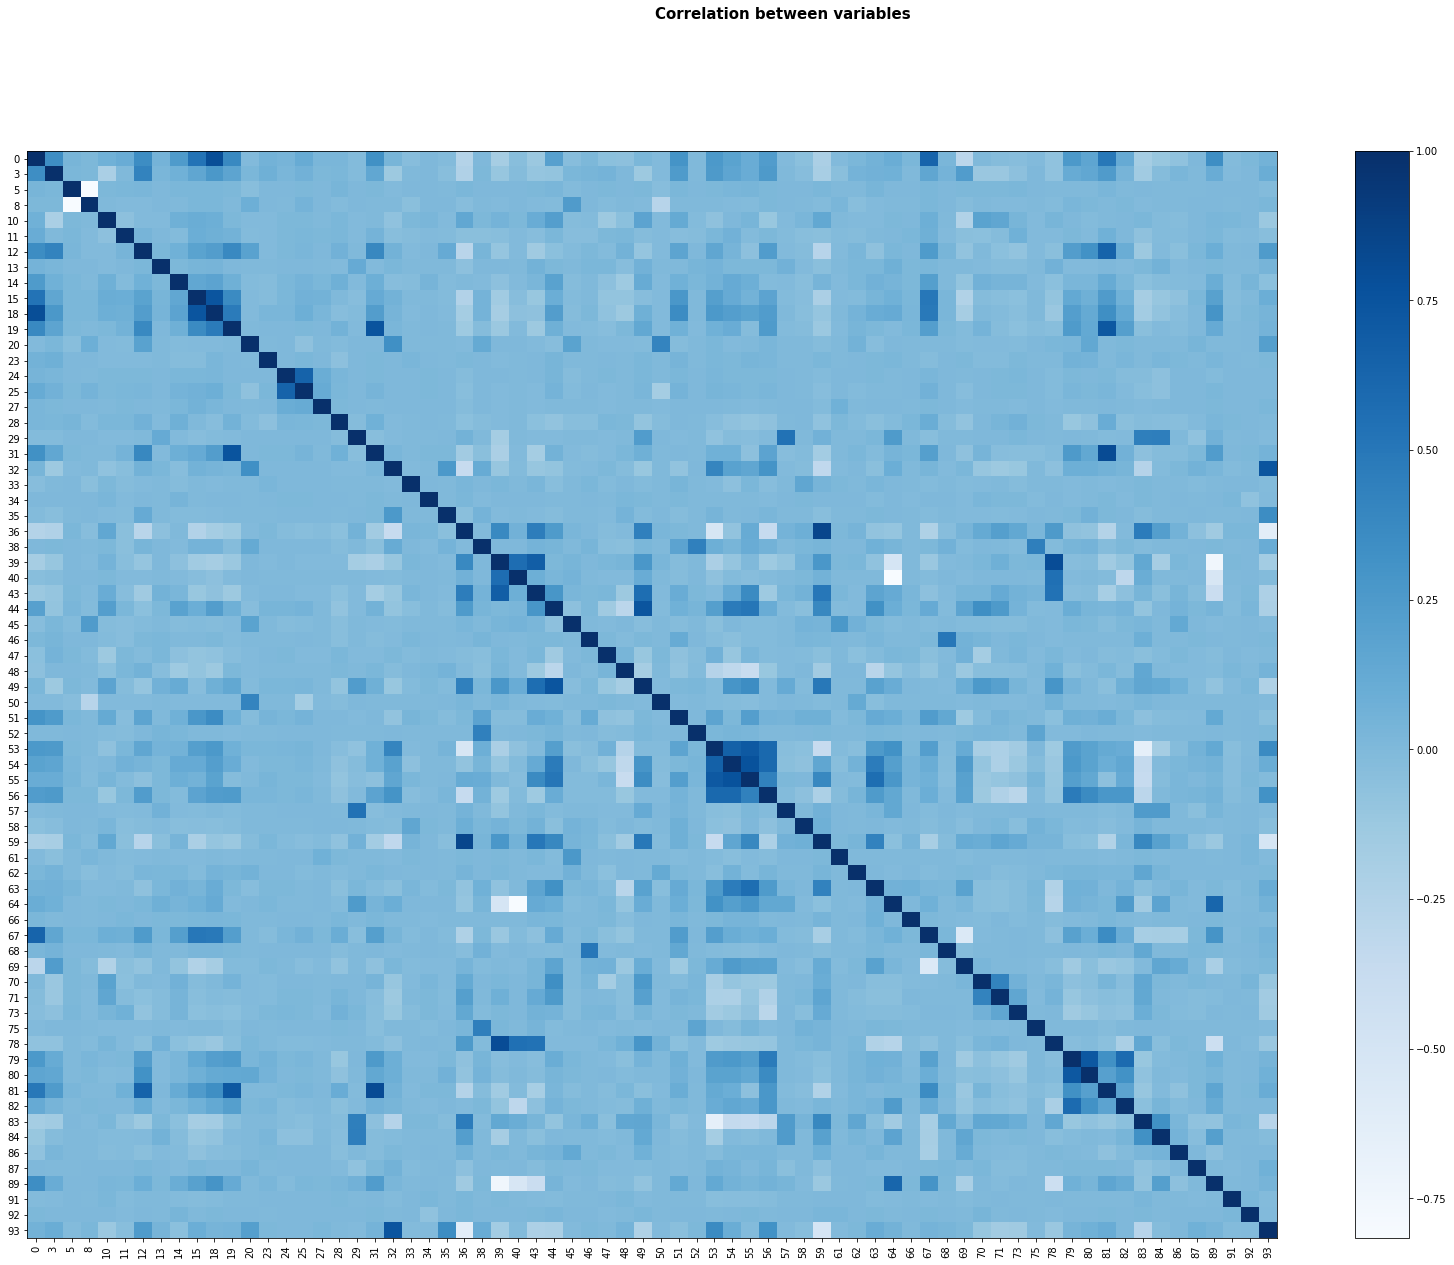

In [12]:
import matplotlib.pyplot as plt


corr = data_train.corr()
#Plot Correlation Matrix using Matplotlib
plt.figure(figsize=(28, 20))
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

Vemos que o novo dataset não apresenta covariáveis altamente correlacionadas 

# Modelagem

Agora, vamos criar modelos para tentar prever se a empresa irá falir ou não, de acordo com os atributos. Como dito anteriormente, vamos verificar se o número de atributos pode gerar *overfitting* e se conseguimos um modelo melhor usando técnicas de seleção de atributos e/ou PCA

## Usando todos os atributos:

Vamos padronizar os dados:

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data_train)
X_train = scaler.transform(data_train)
X_test = scaler.transform(data_test)

Criamos agora um modelo de KNN com gridsearch:


Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'metric': 'euclidean', 'n_neighbors': 19}
Melhor roc:  0.5113636363636364
Melhor f1:  0.044444444444444446


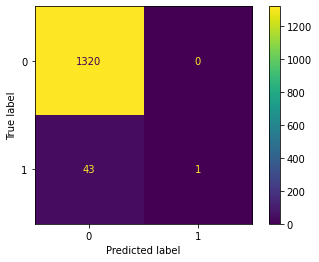

In [14]:
class_labels = np.unique(y)

knn = KNeighborsClassifier()
k_range = list(range(5, 20))
param_grid = [{'n_neighbors': k_range,
               'metric': ['euclidean', 'chebyshev']}]

# defining parameter range
model = GridSearchCV(estimator = knn, param_grid = param_grid, cv=10,
                     scoring='roc_auc', return_train_score=False, verbose=1)
model.fit(X_train, y_train)
print(model.best_params_)

y_pred = model.predict(X_test)
print('Melhor roc: ', roc_auc_score(y_test, y_pred))
print('Melhor f1: ', f1_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Vemos que, devido ao desbalanceamento dos dados, o modelo tem uma forte tendência de prever que a empresa não vai falir, mesmo quando ela irá. Por isso, precisamos rebalancear os dados de treino:

(array([4596.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5276.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

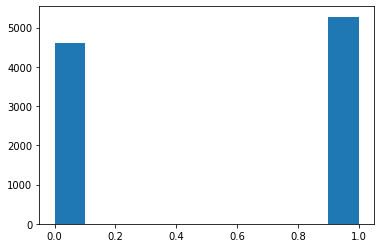

In [15]:
from imblearn.combine import SMOTEENN
ros = SMOTEENN()
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
plt.hist(y_train_resampled)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'metric': 'euclidean', 'n_neighbors': 10}
Melhor roc:  0.8424242424242424
Melhor f1:  0.2578397212543554


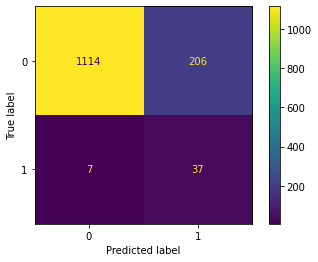

In [16]:
knn = KNeighborsClassifier()
k_range = list(range(5, 20))
param_grid = [{'n_neighbors': k_range,
               'metric': ['euclidean', 'chebyshev']}]

# defining parameter range
model = GridSearchCV(estimator = knn, param_grid = param_grid, cv=10,
                     scoring='roc_auc', return_train_score=False, verbose=1)
model.fit(X_train_resampled, y_train_resampled)
print(model.best_params_)

y_pred = model.predict(X_test)
print('Melhor roc: ', roc_auc_score(y_test, y_pred))
print('Melhor f1: ', f1_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Vemos que, com os dados rebalanceados, temos um aumento na área da curva ROC, no score F1 e, pela matriz de confusão, vemos que o modelo prevê muito melhor quando a empresa irá falir.

Vamos também usar outras formas de classificação e as comparar:

Fitting 10 folds for each of 6 candidates, totalling 60 fits
{'C': 1, 'class_weight': 'balanced'}
Melhor roc:  0.8617424242424243
Melhor f1:  0.28464419475655434


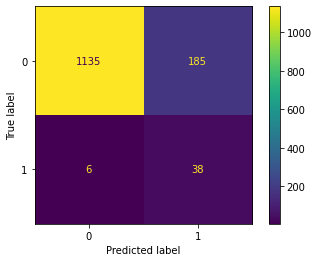

In [17]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(solver = 'sag', max_iter=10000)

log_reg_params = {'C': [0.1, 1, 10],
                  'class_weight': ['balanced', None],}
  
model = GridSearchCV(estimator = log_reg, param_grid = log_reg_params, cv=10,
                     scoring='roc_auc', return_train_score=False, verbose=1)
model.fit(X_train_resampled,y_train_resampled)
print(model.best_params_)
y_pred = model.predict(X_test)
print('Melhor roc: ', roc_auc_score(y_test, y_pred))
print('Melhor f1: ', f1_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
{'class_weight': 'balanced', 'criterion': 'entropy'}
Melhor roc:  0.8405303030303031
Melhor f1:  0.4671532846715329


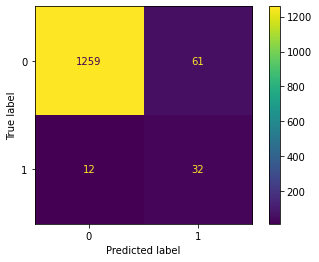

In [18]:
from sklearn.ensemble import RandomForestClassifier

rfc_sm = RandomForestClassifier(bootstrap=False, max_features='log2')
#rfc_params = {}
rfc_params = {
              'class_weight' : ['balanced','balanced_subsample'],
              'criterion' : ['gini', 'entropy'],}

model = GridSearchCV(estimator = rfc_sm, param_grid = rfc_params, cv=10,
                     scoring='roc_auc', return_train_score=False, verbose=1)
model.fit(X_train_resampled, y_train_resampled)
print(model.best_params_)

y_pred = model.predict(X_test)
print('Melhor roc: ', roc_auc_score(y_test, y_pred))
print('Melhor f1: ', f1_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Apesar da Floresta Aleatória ter melhores métricas, nesse caso, prever que a empresa não irá falir quando ela na verdade irá é mais custoso que prever que ela irá, quando na verdade não irá. Dessa forma, entre esses 3 modelos, o melhor é a  Regressão Logística, já que minimiza os erros mais danosos.

## Seleciona atributos com f_classif

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

sel = SelectKBest(f_classif, k=45)
sel.fit(data_train, y_train)

X_train = sel.transform(data_train)
X_test = sel.transform(data_test)
X_train.shape

(5455, 45)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
0,-0.176677,-0.542117,-0.748887,-0.065632,-0.151822,0.578043,0.348356,-0.216287,-0.132579,0.095186,0.585176,0.052407,-0.160709,-0.034023,-0.023638,-1.083483,-0.122980,-0.351417,-0.016414,-0.368932,0.010330,-0.409146,-0.229818,-0.434131,-1.253999,-1.055283,-0.830000,-0.072261,-0.828195,0.248580,-0.161033,-0.060811,-0.617879,0.471418,-0.013541,-0.252473,-0.300176,-0.199694,-0.117743,-0.137548,-0.190312,-0.030289,-0.04968,0.019121,0.475372
1,0.496220,-0.496455,-0.748887,-0.131227,-0.151822,0.998953,0.189136,0.649462,0.398657,0.034927,-1.656456,0.188031,-0.160037,-0.034023,-0.023638,0.870610,-0.103389,0.039364,0.114630,0.952755,2.500991,-0.409146,0.777465,0.652619,1.700036,1.267121,-0.636123,-0.072261,0.821530,0.111845,0.429017,0.292229,-0.415672,1.578574,-0.013541,0.063315,-0.013055,-0.054251,0.313115,0.019307,-0.191546,-0.030289,-0.04968,0.259424,-0.509747
2,0.363741,-0.060126,-0.205997,0.195128,-0.151822,0.861056,-0.068585,0.074272,0.000230,0.025690,0.360148,-0.242242,0.103272,-0.034023,-0.023638,-0.899556,-0.112657,-0.351417,-0.046865,-0.343070,-0.185904,-0.409146,0.020564,0.362928,0.311491,-0.224250,0.807019,-0.072261,-0.775262,-0.143224,0.048712,0.285853,-0.656487,-0.644596,-0.013541,-0.252473,0.563513,0.343774,0.238679,0.224626,-0.497354,-0.030289,-0.04968,0.142392,0.253378
3,-0.575729,-0.726880,-0.748887,-0.238211,-0.151822,1.615517,-0.223757,-0.373427,0.151715,0.022757,0.207820,0.539985,-0.243286,-0.034023,-0.023638,1.059554,-0.030343,-0.124340,-0.046865,0.547901,0.478272,-0.409146,-0.223343,0.415432,1.944110,1.709395,-0.227311,-0.072261,1.720439,1.133358,0.378049,0.024344,-0.733778,-0.644596,-0.013541,-0.252473,0.526162,0.073242,0.116678,0.444912,-0.014590,-0.030289,-0.04968,-0.018003,-0.541738
4,-1.870631,3.328187,-0.748887,-1.927153,-0.151822,-0.820418,-0.893022,-0.806301,-0.601561,-0.155520,-1.907449,-0.618073,2.143359,-0.034023,-0.023638,-1.826998,0.262336,-0.351417,-0.046865,-0.670549,-1.318023,-0.409146,-0.583806,1.612669,1.309178,0.528298,-0.636057,-0.072261,-1.422408,1.146819,0.246063,-0.670633,0.281908,-0.644596,-0.013541,-0.252473,-0.569783,-1.054182,-1.228358,-0.222198,-0.920690,-0.030289,-0.04968,-0.215186,3.803505


In [22]:
from imblearn.combine import SMOTEENN
ros = SMOTEENN()
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'metric': 'euclidean', 'n_neighbors': 15}
Melhor roc:  0.856439393939394
Melhor f1:  0.25


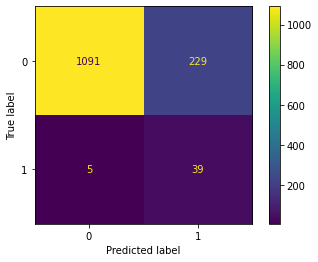

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

knn = KNeighborsClassifier()
k_range = list(range(5, 20))
param_grid = [{'n_neighbors': k_range,
               'metric': ['euclidean', 'chebyshev']}]

# defining parameter range
model = GridSearchCV(estimator = knn, param_grid = param_grid, cv=10,
                     scoring='roc_auc', return_train_score=False, verbose=1)
model.fit(X_train_resampled, y_train_resampled)
print(model.best_params_)

y_pred = model.predict(X_test)
print('Melhor roc: ', roc_auc_score(y_test, y_pred))
print('Melhor f1: ', f1_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Vemos que selecionar as 45 melhores variáveis, apesar de aumentar previsões de falir incorretas, melhora o índice de prever que não irá falir incorretamente.

Fitting 10 folds for each of 6 candidates, totalling 60 fits
{'C': 1, 'class_weight': None}
Melhor roc:  0.8503787878787878
Melhor f1:  0.2781954887218045


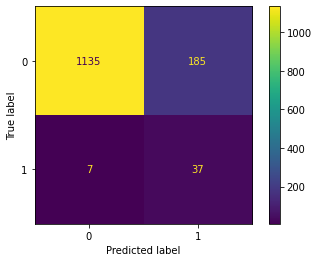

In [24]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(solver = 'sag', max_iter=10000)

log_reg_params = {'C': [0.1, 1, 10],
                  'class_weight': ['balanced', None],}
  
model = GridSearchCV(estimator = log_reg, param_grid = log_reg_params, cv=10,
                     scoring='roc_auc', return_train_score=False, verbose=1)
model.fit(X_train_resampled,y_train_resampled)
print(model.best_params_)
y_pred = model.predict(X_test)
print('Melhor roc: ', roc_auc_score(y_test, y_pred))
print('Melhor f1: ', f1_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
{'class_weight': 'balanced_subsample', 'criterion': 'entropy'}
Melhor roc:  0.8390151515151516
Melhor f1:  0.4539007092198582


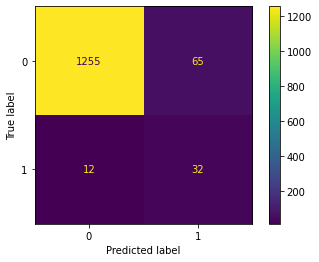

In [25]:
from sklearn.ensemble import RandomForestClassifier

rfc_sm = RandomForestClassifier(bootstrap=False, max_features='log2')
#rfc_params = {}
rfc_params = {
              'class_weight' : ['balanced','balanced_subsample'],
              'criterion' : ['gini', 'entropy'],}

model = GridSearchCV(estimator = rfc_sm, param_grid = rfc_params, cv=10,
                     scoring='roc_auc', return_train_score=False, verbose=1)
model.fit(X_train_resampled, y_train_resampled)
print(model.best_params_)

y_pred = model.predict(X_test)
print('Melhor roc: ', roc_auc_score(y_test, y_pred))
print('Melhor f1: ', f1_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Pelos motivos citados anterioremente, nesse caso escolheríamos o KNN.

## Transforma com PCA

In [26]:
pca = PCA(n_components=35, svd_solver='full')
pca.fit(data_train)
X_train = pca.transform(data_train)
X_test = pca.transform(data_test)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from imblearn.combine import SMOTEENN
ros = SMOTEENN()
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'metric': 'euclidean', 'n_neighbors': 15}
Melhor roc:  0.7772727272727273
Melhor f1:  0.19701492537313434


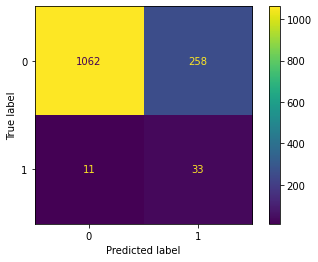

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

knn = KNeighborsClassifier()
k_range = list(range(5, 20))
param_grid = [{'n_neighbors': k_range,
               'metric': ['euclidean', 'chebyshev']}]

# defining parameter range
model = GridSearchCV(estimator = knn, param_grid = param_grid, cv=10,
                     scoring='roc_auc', return_train_score=False, verbose=1)
model.fit(X_train_resampled, y_train_resampled)
print(model.best_params_)

y_pred = model.predict(X_test)
print('Melhor roc: ', roc_auc_score(y_test, y_pred))
print('Melhor f1: ', f1_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
{'C': 10, 'class_weight': 'balanced'}
Melhor roc:  0.8462121212121212
Melhor f1:  0.26714801444043323


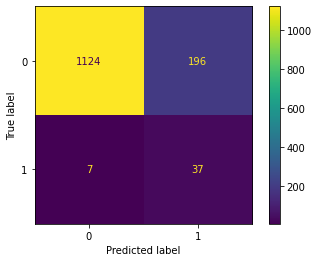

In [29]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(solver = 'sag', max_iter=10000)

log_reg_params = {'C': [0.1, 1, 10],
                  'class_weight': ['balanced', None],}
  
model = GridSearchCV(estimator = log_reg, param_grid = log_reg_params, cv=10,
                     scoring='roc_auc', return_train_score=False, verbose=1)
model.fit(X_train_resampled,y_train_resampled)
print(model.best_params_)
y_pred = model.predict(X_test)
print('Melhor roc: ', roc_auc_score(y_test, y_pred))
print('Melhor f1: ', f1_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
{'class_weight': 'balanced', 'criterion': 'entropy'}
Melhor roc:  0.6844696969696971
Melhor f1:  0.3130434782608696


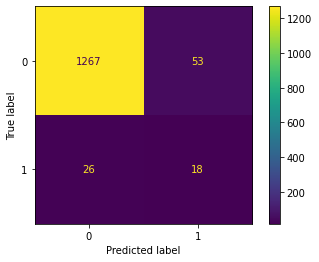

In [30]:
from sklearn.ensemble import RandomForestClassifier

rfc_sm = RandomForestClassifier(bootstrap=False, max_features='log2')
#rfc_params = {}
rfc_params = {
              'class_weight' : ['balanced','balanced_subsample'],
              'criterion' : ['gini', 'entropy'],}

model = GridSearchCV(estimator = rfc_sm, param_grid = rfc_params, cv=10,
                     scoring='roc_auc', return_train_score=False, verbose=1)
model.fit(X_train_resampled, y_train_resampled)
print(model.best_params_)

y_pred = model.predict(X_test)
print('Melhor roc: ', roc_auc_score(y_test, y_pred))
print('Melhor f1: ', f1_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# Conclusão:

Vemos que, considerando todos os modelos, o que apresentou melhores resultados para nosso caso, foi o KNN usando métodos de seleção de atributos.